<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8968 entries, 0 to 8967
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      8968 non-null   object 
 1   X1      8968 non-null   object 
 2   X2      8968 non-null   object 
 3   X3      8968 non-null   object 
 4   X4      8968 non-null   object 
 5   X5      8967 non-null   object 
 6   X6      8968 non-null   object 
 7   X7      8967 non-null   object 
 8   X8      8968 non-null   object 
 9   X9      8968 non-null   object 
 10  X10     8961 non-null   object 
 11  X11     8965 non-null   object 
 12  Y       7494 non-null   float64
dtypes: float64(1), object(12)
memory usage: 910.9+ KB
None
                 Y
count  7494.000000
mean      4.188711
std       0.547055
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
X0        0
X1        0
X2        0
X3        0
X4        0
X5        1
X6        0
X7        1
X8        0

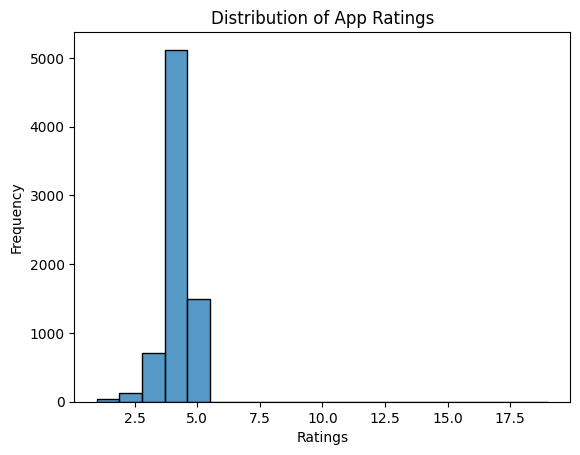

C:\Users\Tech Trick\AppData\Local\Temp\ipykernel_2108\2507503953.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
c:\Users\Tech Trick\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.443e-01, tolerance: 1.933e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Tech Trick\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.803e-01, tolerance: 1.933e-01
  model = c

                                MAE       MSE        R2
Linear Regression          0.387836  0.325704 -0.113804
Ridge Regression           0.376340  0.301694 -0.031699
Lasso Regression           0.368125  0.273956  0.063159
ElasticNet                 0.385346  0.292820 -0.001352
CatBoost                   0.367270  0.275072  0.059340
Support Vector Regression  0.345506  0.267149  0.086435
Best Model: Support Vector Regression
Performance: {'MAE': 0.3455063200773485, 'MSE': 0.26714914966322534, 'R2': 0.08643541643156927}


C:\Users\Tech Trick\AppData\Local\Temp\ipykernel_2108\2507503953.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[col] = 0
C:\Users\Tech Trick\AppData\Local\Temp\ipykernel_2108\2507503953.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[col] = 0
C:\Users\Tech Trick\AppData\Local\Temp\ipykernel_2108\2507503953.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

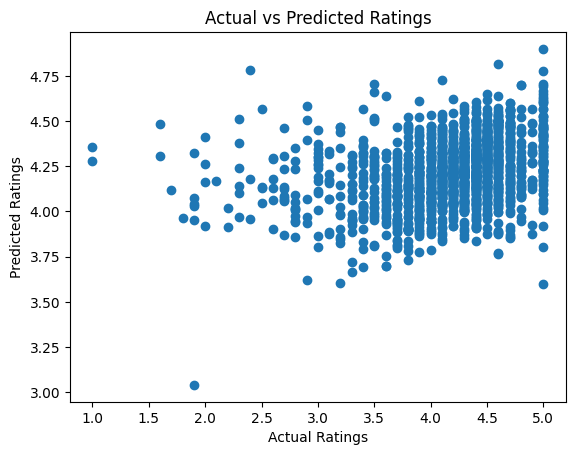

In [ ]:
import pandas as pd

train_data = pd.read_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/train.csv')
test_data = pd.read_csv('d:/asu/Semester 6 - Spring 23/CSE472 - Artificial Intelligence/project/test.csv')

# Step 3: Data Exploration
print(train_data.info())
print(train_data.describe())
print(train_data.isnull().sum())

# Visualize the distribution of ratings
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_data['Y'], bins=20)
plt.title('Distribution of App Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

# Step 4: Data Preprocessing
# Handle missing values
train_data.fillna(method='ffill', inplace=True)

# Identify non-numeric columns
non_numeric_cols = train_data.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numeric using one-hot encoding
train_data = pd.get_dummies(train_data, columns=non_numeric_cols, drop_first=True)

# Update X and y after encoding
X = train_data.drop(['Y'], axis=1)
y = train_data['Y']

# Convert categorical variables in train_data to numerical
columns_to_encode = ['X1', 'X6', 'X7']
existing_columns = [col for col in columns_to_encode if col in train_data.columns]
if existing_columns:
    train_data = pd.get_dummies(train_data, columns=existing_columns, drop_first=True)

# Split features and target
X = train_data.drop(['Y'], axis=1)
y = train_data['Y']

# Step 5: Model Selection
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training
from sklearn.linear_model import ElasticNet, LassoCV, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from matplotlib.widgets import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': LassoCV(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regression': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Step 7: Model Evaluation
results_df = pd.DataFrame(results).T
print(results_df)

# Step 8: Prediction on Test Data
# Select the best model based on MAE
best_model_name = min(results, key=lambda x: results[x]['MAE'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Performance: {results[best_model_name]}")

best_model.fit(X, y)  # Train on the full dataset

# Ensure test_data has the same columns as X
columns_to_encode = ['X1', 'X6', 'X7']
existing_columns = [col for col in columns_to_encode if col in test_data.columns]
if existing_columns:
    test_data = pd.get_dummies(test_data, columns=existing_columns, drop_first=True)

missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[X.columns]  # Reorder columns to match training data

test_predictions = best_model.predict(test_data)


# Step 9: Visualization
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


Sure, here's a proposed directory structure for a project to develop multiple regression models for predicting app ratings:





Create Workspace...